# Modelo Discriminativo: Regresión Logística

- Vamos a modelar el posterior
- $p(C_1|\phi(x_n)) = \sigma(w^\top x_n)$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


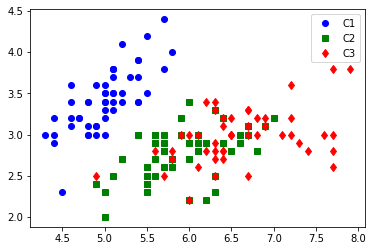

In [ ]:
dataset = load_iris()

#Utilicemos el ejemplo biclase
X = dataset.data
X = X[:,:]
N, D = X.shape
t = dataset.target
names = dataset.target_names

print(names)
print(t)

plt.plot(X[:50,0],X[:50,1],'ob')
plt.plot(X[50:100,0],X[50:100,1],'sg')
plt.plot(X[100:,0],X[100:,1],'dr')
plt.legend(('C1','C2','C3'))
plt.show()

In [ ]:
modelRL = LogisticRegression(penalty='l2', C = 10.)
modelRL.fit(X,t)
print('w:', modelRL.coef_)

yEst = modelRL.predict(X)

print('t_est: ',yEst)

w: [[-0.4121457   2.13700681 -4.29342614 -1.96156454]
 [ 1.03717874 -0.07282152 -0.46183264 -2.32998147]
 [-0.62503304 -2.06418529  4.75525878  4.29154601]]
t_est:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


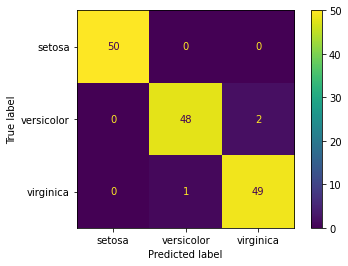

Acc:  0.98


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cMat = confusion_matrix(t, yEst)

ax = ConfusionMatrixDisplay(cMat,display_labels=['setosa','versicolor','virginica'])
ax.plot()
plt.show()

print('Acc: ',accuracy_score(t, yEst))

Siempre es recomendable partir el conjunto de datos en Entrenamiento y Test (hold-out-validation)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from ipywidgets import interact

In [ ]:
@interact(tamTest = [0.1,0.2,0.3,0.4,0.5], C = [0.1,1.,10,100.])

def experimentoRL(tamTest, C):
  Xtrain, Xtest, ytrain, ytest = train_test_split(X,t,test_size=tamTest, random_state=123)


  modelRL = LogisticRegression(penalty='l2', C = C,max_iter= 1000)
  modelRL.fit(Xtrain,ytrain)
  #print('w:', modelRL.coef_)

  yEst = modelRL.predict(Xtest)

  #print('t_est: ',yEst)

  cMat = confusion_matrix(ytest, yEst)

  ax = ConfusionMatrixDisplay(cMat,display_labels=['setosa','versicolor','virginica'])
  ax.plot()
  plt.show()

  print('Acc: ',accuracy_score(ytest, yEst))

interactive(children=(Dropdown(description='tamTest', options=(0.1, 0.2, 0.3, 0.4, 0.5), value=0.1), Dropdown(…